In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
data=pd.read_csv("E:/ai_smartbridgeinternship/prokect/T1.csv")
data.head(5)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [3]:
data.drop('Date/Time',axis=1,inplace=True) #will not affect target variable

In [4]:
data.isnull().any()

LV ActivePower (kW)              False
Wind Speed (m/s)                 False
Theoretical_Power_Curve (KWh)    False
Wind Direction (°)               False
dtype: bool

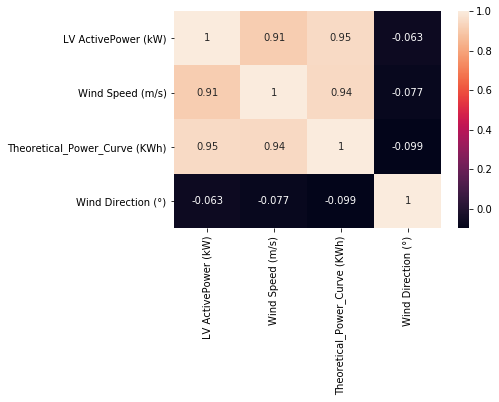

In [5]:
#No missing values in the dataset
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

In [6]:
data.drop('Wind Direction (°)',axis=1,inplace=True)


In [7]:
data

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
0,380.047791,5.311336,416.328908
1,453.769196,5.672167,519.917511
2,306.376587,5.216037,390.900016
3,419.645905,5.659674,516.127569
4,380.650696,5.577941,491.702972
...,...,...,...
50525,2963.980957,11.404030,3397.190793
50526,1684.353027,7.332648,1173.055771
50527,2201.106934,8.435358,1788.284755
50528,2515.694092,9.421366,2418.382503


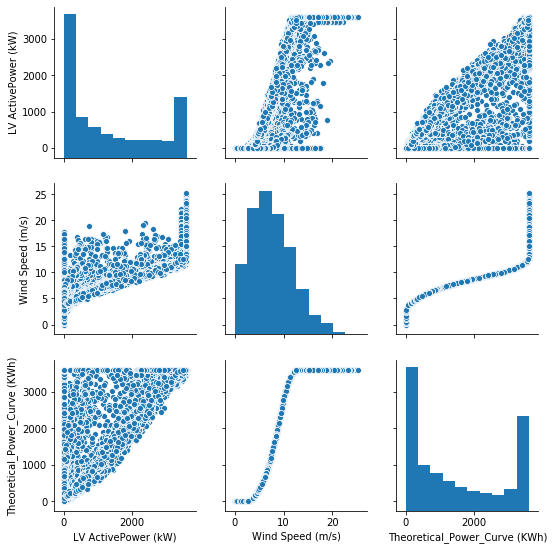

In [8]:
sns.pairplot(data)

Text(0, 0.5, 'Theoretical_Power_Curve (KWh)')

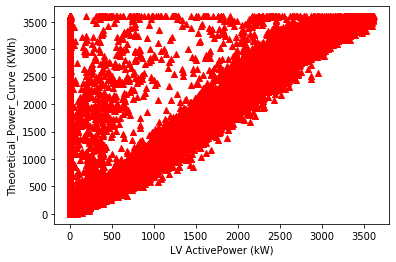

In [9]:
#understanding relationship b/w target variable and input variables
#line graphs will be messy,so trying scatter plots

plt.scatter(data['LV ActivePower (kW)'],data['Theoretical_Power_Curve (KWh)'],color='r',marker='^')
plt.xlabel("LV ActivePower (kW)")
plt.ylabel("Theoretical_Power_Curve (KWh)")

Text(0, 0.5, 'Theoretical_Power_Curve (KWh)')

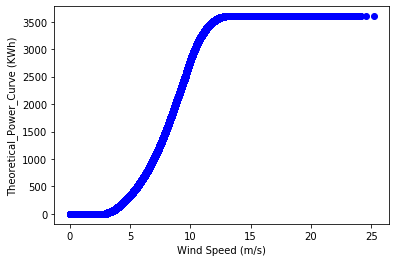

In [10]:
plt.scatter(data['Wind Speed (m/s)'],data['Theoretical_Power_Curve (KWh)'],color='b')
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Theoretical_Power_Curve (KWh)")

In [11]:
x=data.iloc[:,:2].values
y=data.iloc[:,2].values



In [12]:
x.shape

(50530, 2)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
x_train.shape

(40424, 2)

In [15]:
y_train.shape

(40424,)

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train) 
x_test=sc.transform(x_test)

In [17]:
x_train

array([[-0.62965405, -0.47210797],
       [ 0.06845987, -0.06166656],
       [-0.99654381, -0.96283434],
       ...,
       [ 1.3159033 ,  0.86300277],
       [-0.43922436, -0.26381861],
       [ 1.75282901,  1.65369626]])

In [18]:
x_test

array([[-0.55668599, -0.37887692],
       [ 0.23861371,  0.13822832],
       [ 0.43485971,  0.15533474],
       ...,
       [-0.48757878, -0.30153774],
       [ 1.65296231,  1.07516674],
       [ 0.79067982,  0.65454913]])

In [19]:
y_train

array([ 486.13884213, 1152.69070387,   50.65948018, ..., 3336.659665  ,
        781.98799626, 3600.        ])

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
E:\an\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\an\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\an\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\an\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is de

In [21]:
regressor=Sequential()

In [22]:
regressor.add(Dense(units= 2, init ='uniform', activation='relu')) #inputlayer

E:\an\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=2, activation="relu", kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [23]:
regressor.add(Dense(units = 4,init = 'uniform',activation='relu')) #1sthiddenlayer

E:\an\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=4, activation="relu", kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [24]:
regressor.add(Dense(units = 4,init = 'uniform',activation='relu')) #2nd hidden layer

E:\an\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=4, activation="relu", kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [25]:
regressor.add(Dense(units = 4,init = 'uniform',activation='relu')) #3rd hidden layer

E:\an\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=4, activation="relu", kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [26]:
regressor.add(Dense(units = 1,init = 'uniform',activation='linear')) #outputlayer

E:\an\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="linear", kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [27]:
regressor.compile(optimizer="adam",loss="mse",metrics=["mse"])

In [28]:
regressor.fit(x_train,y_train,batch_size=16,epochs=100)





Epoch 1/100
40424/40424 [==============================] - 9s 225us/step - loss: 1554926.7275 - mean_squared_error: 1554926.7275
Epoch 2/100
40424/40424 [==============================] - 8s 188us/step - loss: 124235.4868 - mean_squared_error: 124235.4868
Epoch 3/100
40424/40424 [==============================] - 7s 163us/step - loss: 117534.2953 - mean_squared_error: 117534.2953
Epoch 4/100
40424/40424 [==============================] - 6s 158us/step - loss: 114870.4844 - mean_squared_error: 114870.4844
Epoch 5/100
40424/40424 [==============================] - 7s 164us/step - loss: 113889.9375 - mean_squared_error: 113889.9375
Epoch 6/100
40424/40424 [==============================] - 6s 161us/step - loss: 113443.4928 - mean_squared_error: 113443.4928
Epoch 7/100
40424/40424 [==============================] - 7s 180us/step - loss: 113239.8327 - mean_squared_error: 113239.8327
Epoch 8/100
40424/40424 [==============================] - 6s 157us/step - loss: 113194.5856 - mean_squar

In [29]:
y_pred=regressor.predict(x_test)
y_pred

array([[ 831.39844],
       [1735.353  ],
       [1880.8376 ],
       ...,
       [ 932.698  ],
       [3355.0962 ],
       [2473.3242 ]], dtype=float32)

In [30]:
y_test

array([ 609.08146942, 1608.17935444, 1650.73919566, ...,  722.1880659 ,
       3535.14867257, 2972.39826913])

In [34]:
y_p=regressor.predict(sc.transform(np.array([[306,5.2]])))

In [35]:
y_p

array([[565.8085]], dtype=float32)

In [36]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)

In [37]:
regressor.save("project.h5")